# HR Analytics

***Employee leaving or not ?***

Analysing direct impact on employee retention and figure out an employee leaving the company or not using ***Logistic Regression***

Dataset from [https://www.kaggle.com/giripujar/hr-analytics/code](https://www.kaggle.com/giripujar/hr-analytics/code)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# load data 
df = pd.read_csv("HR_comma_sep.csv")

### Exploring data

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# change the position of 'left' col
front = df['left']
df.drop(['left'], axis='columns', inplace=True)
df.insert(0, 'left', front)

In [16]:
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [9]:
# check categories in 'Deparment' col
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
# check categories in 'salary' col
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [11]:
# group by turnover
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Data Visualization

In [63]:
    ############# impact of Salary on tournover  ################# 
sal = pd.crosstab(df.salary,df.left)
sal

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [68]:
sal = sal.div(sal.sum(1).astype(float), axis=0)
sal

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


Text(0, 0.5, 'Proportion of Employees')

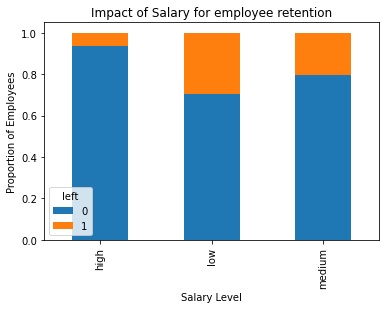

In [69]:
sal.plot(kind="bar", stacked=True)
plt.title('Impact of Salary for employee retention')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig(salary.png')

In [79]:
   ############# Impact of Department ##################
dept = pd.crosstab(df.Department, df.left)
dept

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


Text(0, 0.5, 'Proportion of turnover')

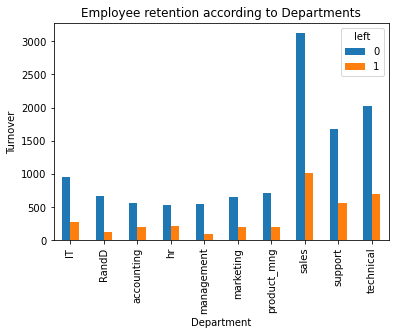

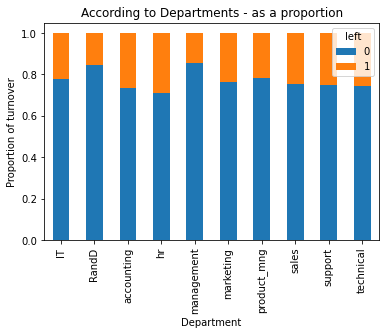

In [88]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.title('Employee retention according to Departments')
plt.xlabel('Department')
plt.ylabel('Turnover')


# as a proportion
dept.div(dept.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('According to Departments - as a proportion')
plt.xlabel('Department')
plt.ylabel('Proportion of turnover')

